Raw dataset:
                                                  review sentiment
0      One of the other reviewers has mentioned that ...  positive
1      A wonderful little production. <br /><br />The...  positive
2      I thought this was a wonderful way to spend ti...  positive
3      Basically there's a family where a little boy ...  negative
4      Petter Mattei's "Love in the Time of Money" is...  positive
...                                                  ...       ...
49995  I thought this movie did a down right good job...  positive
49996  Bad plot, bad dialogue, bad acting, idiotic di...  negative
49997  I am a Catholic taught in parochial elementary...  negative
49998  I'm going to have to disagree with the previou...  negative
49999  No one expects the Star Trek movies to be high...  negative

[50000 rows x 2 columns]
After preprocessing, the dataset:
                                                  review  sentiment
0      One of the other reviewers has mentioned that ..

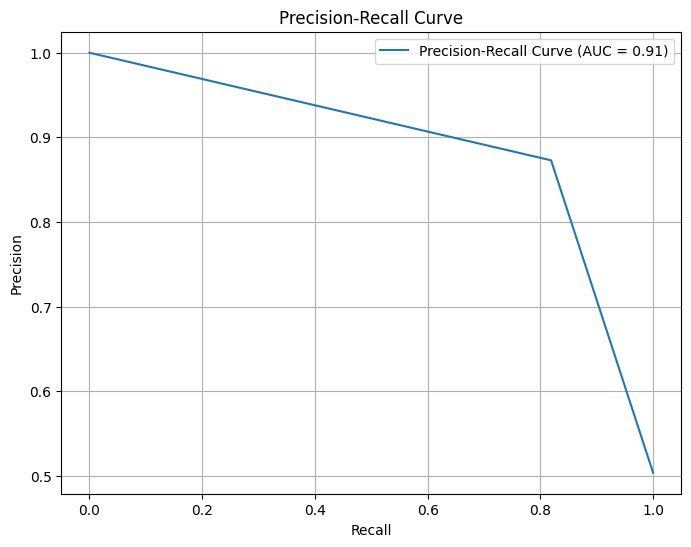

In [47]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer
from collections import Counter

df = pd.read_csv('/content/IMDB Dataset.csv')
print("Raw dataset:")
print(df)

df['sentiment'].value_counts()

df['sentiment'] = df['sentiment'].apply(lambda x: 1 if x == 'positive' else 0)
print("After preprocessing, the dataset:")
print(df)

# Separate positive and negative reviews
positive_reviews = df[df['sentiment'] == 1]['review']
negative_reviews = df[df['sentiment'] == 0]['review']

# Create CountVectorizers for positive and negative reviews
vectorizer_positive = CountVectorizer(stop_words='english')
vectorizer_negative = CountVectorizer(stop_words='english')

# Fit and transform the reviews
positive_counts = vectorizer_positive.fit_transform(positive_reviews)
negative_counts = vectorizer_negative.fit_transform(negative_reviews)

# Get the vocabulary and counts for positive reviews
positive_vocab = vectorizer_positive.get_feature_names_out()
positive_counts_sum = positive_counts.sum(axis=0).A1
positive_word_counts = dict(zip(positive_vocab, positive_counts_sum))

# Get the vocabulary and counts for negative reviews
negative_vocab = vectorizer_negative.get_feature_names_out()
negative_counts_sum = negative_counts.sum(axis=0).A1
negative_word_counts = dict(zip(negative_vocab, negative_counts_sum))


# Find the most common words
n = 10 # Number of most common words to display

positive_common_words = Counter(positive_word_counts).most_common(n)
negative_common_words = Counter(negative_word_counts).most_common(n)

print("Most common words in positive reviews:")
for word, count in positive_common_words:
    print(f"{word}: {count}")

print("\nMost common words in negative reviews:")
for word, count in negative_common_words:
    print(f"{word}: {count}")

from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
vectorizer = CountVectorizer()
X = vectorizer.fit_transform(df['review'])

X_train, X_test, y_train, y_test = train_test_split(X, df['sentiment'], test_size=0.2, random_state=42)

from sklearn.naive_bayes import MultinomialNB

model = MultinomialNB()
model.fit(X_train, y_train)
from sklearn.metrics import accuracy_score, classification_report

y_pred = model.predict(X_test)
y_pred

accuracy_score = accuracy_score(y_test, y_pred)
accuracy_score
print("Classification report:")
print(classification_report(y_test, y_pred))

# precision and recall curves plot
from sklearn.metrics import precision_recall_curve
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 6))
plt.plot(recall, precision, label=f'Precision-Recall Curve (AUC = {auc_pr:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend()
plt.grid(True)
plt.show()